## Linea de espera de un consultorio

Veamos un ejemplo de lienas de espera en un consultorio. El planteamiento del problema es el siguiente:

Se desea encontrar el número de pacientes promedio en el consultorio de un doctor, para ello se realizan observaciones cada 5 minutos y se registran en la tabla siguiente:

<table>
    <tr style="background-color: indianred;">
        <td style="background-color: indianred;"></td>
        <th>0</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
    </tr>
    <tr>
        <th style="background-color: indianred;">0</th>
        <th>3</th>
        <th>5</th>
        <th>2</th>
        <th>0</th>
        <th>0</th>
    </tr>
    <tr>
        <th style="background-color: indianred;">1</th>
        <th>8</th>
        <th>7</th>
        <th>0</th>
        <th>1</th>
        <th>4</th>
    </tr>
    <tr>
        <th style="background-color: indianred;">2</th>
        <th>5</th>
        <th>5</th>
        <th>5</th>
        <th>5</th>
        <th>5</th>
    </tr>
    <tr>
        <th style="background-color: indianred;">3</th>
        <th>5</th>
        <th>0</th>
        <th>10</th>
        <th>0</th>
        <th>0</th>
    </tr>
    <tr>
        <th style="background-color: indianred;">4</th>
        <th>1</th>
        <th>0</th>
        <th>0</th>
        <th>0</th>
        <th>1</th>
    </tr>
</table>

Este problema lo resolveremos de dos formas diferentes, por simulación y  analíticamente.

## Simulación

### Importamos librerias

In [21]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Definimos la funcion 'experimento'

La función 'experimento' simula el comportamiento de una cadena de Markov donde los estados representan el número de pacientes en un consultorio médico. Utiliza una matriz de probabilidades de transición para determinar el cambio de estados a lo largo de 100 observaciones diarias y promedia los resultados sobre N días para estimar el número esperado de pacientes.

In [22]:
def experimento(N):
    pacientes = []  # Guardará las medias de pacientes esperados por iteración.
    ensayos = []  # Guardará las iteraciones.

    probabilidades = [
        [3/10, 5/10, 2/10, 0, 0],
        [8/20, 7/20, 0, 1/20, 4/20],
        [1/5, 1/5, 1/5, 1/5, 1/5],
        [5/15, 0, 10/15, 0, 0],
        [1/2, 0, 0, 0, 1/2]
    ]  # Probabilidades de transición.

    estados = [0, 1, 2, 3, 4]  # Posibles estados (número de pacientes).

    pacientes_totales = 0
    for i in range(1, N+1):
        pacientes_inicial = random.choice(estados)  # Estado inicial aleatorio.
        for j in range(100):  # 100 observaciones durante el día.
            pacientes_final = random.choices(estados, weights=probabilidades[pacientes_inicial])[0]  # Transición al siguiente estado.
            pacientes_inicial = pacientes_final  # Actualiza el estado inicial.
        pacientes_totales += pacientes_final  # Acumula el total de pacientes.
        ensayos.append(i)  # Guarda la iteración actual.
        pacientes.append(pacientes_totales / i)  # Calcula y guarda la media de pacientes esperados.

    return pacientes  # Retorna la lista de medias de pacientes esperados por iteración.

### Llamamos a la función 'experimento' y graficamos

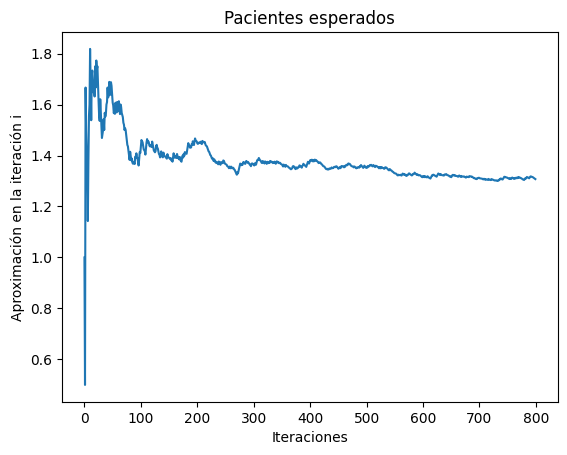

In [23]:
exp = experimento(800)

plt.plot(exp)
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación en la iteración i')
plt.title('Pacientes esperados')

plt.show()

### Repeticion del experimento y graficación

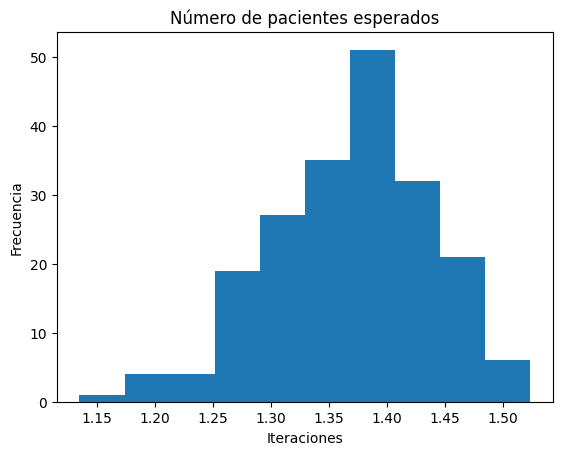

In [24]:
def sim(repeticiones): 
    Num_pacientes = []
    for i in range(repeticiones):
        Num_pacientes.append(np.mean(experimento(750))) 
    return Num_pacientes 

N = 200
simulacion = sim(N)

np.mean(simulacion)

plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Número de pacientes esperados')
plt.show()

## Solución analítica 

El espacio de estados asociado a la cadena de Markov anterior es $S = \{0,1,2,3,4\}$, en donde: **0:= 0 Pacientes**, **1:= 1 Paciente**, **2:= 2 Pacientes** y **3:= Pacientes**.

La matriz de transición asociada a la cadena anterior es:
\begin{equation*}
P = 
\begin{bmatrix}
\frac{3}{10} & \frac{5}{10} & \frac{2}{10} & 0 & 0\\
\frac{8}{20} & \frac{7}{20} & 0 & \frac{1}{20} & \frac{4}{20}\\
\frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25}\\
\frac{5}{15} & 0 & \frac{10}{15} & 0 & 0\\
\frac{1}{2} & 0 & 0 & 0 & \frac{1}{2}
\end{bmatrix}
\end{equation*}

Utilizando la propiedad de **estacionalidad a largo plazo** para una cadena de Markov:
\begin{equation*}
\begin{aligned}
\pi \textbf{P}  =& \pi\\
\begin{bmatrix}
\pi_0 & \pi_1 & \pi_2 & \pi_3 & \pi_4
\end{bmatrix} \times
\begin{bmatrix}
\frac{3}{10} & \frac{5}{10} & \frac{2}{10} & 0 & 0\\
\frac{8}{20} & \frac{7}{20} & 0 & \frac{1}{20} & \frac{4}{20}\\
\frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25}\\
\frac{5}{15} & 0 & \frac{10}{15} & 0 & 0\\
\frac{1}{2} & 0 & 0 & 0 & \frac{1}{2}
\end{bmatrix} 
&=
\begin{bmatrix}
\pi_0 \\
\pi_1\\
\pi_2\\
\pi_3\\
\pi_4
\end{bmatrix}
\\
\end{aligned}
\end{equation*}
Además de esto, agragamos la siguiente condición, es decir
\begin{equation*}
\pi_0 + \pi_1 + \pi_2 + \pi_3 + \pi_4 = 1
\end{equation*}
El sistema de ecuaciones queda:



\begin{equation*}
\begin{aligned}
\begin{bmatrix}
-\frac{7}{10} & \frac{8}{20} & \frac{1}{5} & \frac{5}{15} & \frac{1}{2} \\
\frac{5}{10} & -\frac{13}{20} & \frac{1}{5} & 0 & 0 \\
\frac{2}{10} & 0 & -\frac{4}{5} & \frac{10}{15} & 0 \\
0 & \frac{1}{20} & \frac{1}{5} & -1 & 0 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}  \times 
\begin{bmatrix}
\pi_0 \\
\pi_1\\
\pi_2\\
\pi_3\\
\pi_4
\end{bmatrix} &=
\begin{bmatrix}
0\\
0\\
0\\
0\\
1
\end{bmatrix}
\\
\end{aligned}
\end{equation*}

Resolviendo el sistema de ecuaciones, tenemos:
\begin{equation*}
\begin{aligned}
\pi_0 &= \frac{160}{451} \approx 0.354767\\
\pi_1 &= \frac{140}{451} \approx 0.310421\\
\pi_2 &= \frac{5}{41} \approx 0.121951\\
\pi_3 &= \frac{18}{451} \approx 0.039911\\
\pi_4 &= \frac{78}{451} \approx 0.172929
\end{aligned}
\end{equation*}

## Esl valor esperado de pacientes es:

\begin{equation}
\begin{aligned}
E[\text{número de pacientes}] &= \sum_{i=0}^4 i \times p_i \\
&= 0\left(\frac{160}{451}\right) + 1\left(\frac{140}{451}\right) + 2\left(\frac{5}{41}\right) + 3\left(\frac{18}{451}\right) + 4\left(\frac{78}{451}\right)\\
& \approx 1.3658 
\end{aligned}
\end{equation}
